In [1]:
import os, geopandas as gpd

dep=gpd.read_file(os.path.join('mapas','departamentos','DEPARTAMENTOS.shp'))

In [ ]:
type(dep)

<Axes: >

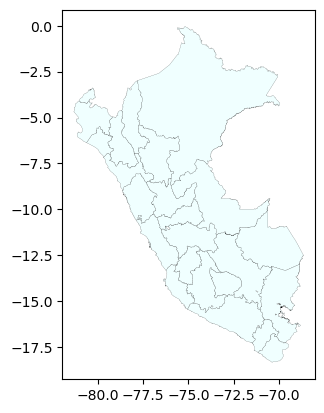

In [2]:
dep.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [3]:
prov=gpd.read_file(os.path.join('mapas','provincias','PROVINCIAS.shp'))

<Axes: >

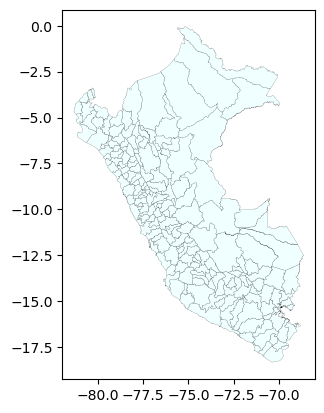

In [4]:
prov.plot(facecolor="azure", #color of polygon fill
              edgecolor='black', #color of lines
              linewidth=0.1) # thickness of lines

In [9]:
dep.to_file(os.path.join("mapas","peruMaps.gpkg"), layer='dep', driver="GPKG")
prov.to_file(os.path.join("mapas","peruMaps.gpkg"), layer='prov', driver="GPKG")

In [ ]:
##Separación

In [17]:
peruMapa="https://github.com/Proyecto-Magallanes/Dashboard/raw/main/mapas/peruMaps.gpkg"

In [18]:
from  fiona import listlayers

listlayers(peruMapa)

['peru', 'dep', 'prov']

In [19]:
depg=gpd.read_file(peruMapa,layer='dep')
provg=gpd.read_file(peruMapa,layer='prov')

In [20]:
#Segundo parte del ejercicio
depg.crs.axis_info


[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [21]:
provg.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [22]:
provg.to_crs(3587)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((7044899.115 -6152421.639, 7045104.02..."
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((6888836.371 -5940422.919, 6889002.65..."
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((7034397.785 -6027197.325, 7035021.17..."
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((6994642.575 -5699630.430, 6994475.11..."
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((6980963.366 -6151220.036, 6980987.42..."
...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((6622991.008 -5788283.010, 6623167.93..."
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((7580669.400 -6310353.403, 7580838.45..."
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((7833336.846 -6628259.457, 7840946.01..."
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((7444073.272 -6481362.490, 7444094.24..."


<Axes: >

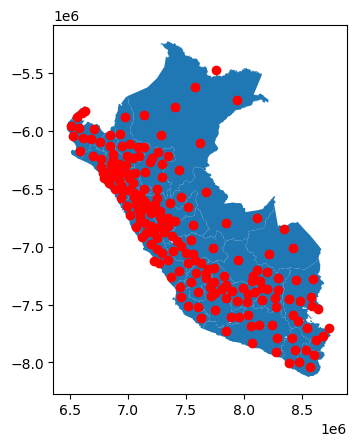

In [23]:
base3587= depg.to_crs(3587).plot()
provg.to_crs(3587).centroid.plot(color='red',ax=base3587)

<Axes: >

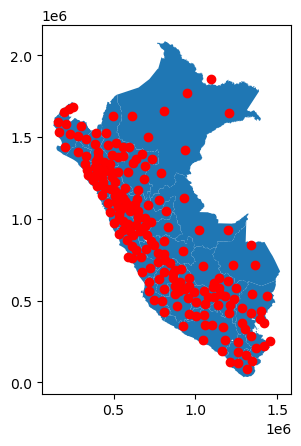

In [24]:
base24891=depg.to_crs(24891).plot()
provg.to_crs(24891).centroid.plot(color='red',ax=base24891)

In [25]:
dep_24891=dep.to_crs(24891)
prov_24891=prov.to_crs(24891)

In [26]:
dep_24891.to_file(os.path.join("mapas","PeruMaps_24891.gpkg"), layer='peru', driver="GPKG")
prov_24891.to_file(os.path.join("mapas","PeruMaps_24891.gpkg"), layer='prov', driver="GPKG")